In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load 30yr US Mortgage Rates Dataset

In [2]:
mortgage_rates = pd.read_csv('sample_data/MORTGAGE30US.csv')

# Exploring the data

In [3]:
#preview the dataframe we're working with
mortgage_rates.head(5)

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [4]:
#check for data types and null values
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 2 columns):
DATE            2523 non-null object
MORTGAGE30US    2523 non-null float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [18]:
mortgage_rates['DATE'].min()

'1971-04-02'

In [20]:
mortgage_rates['DATE'].max()

'2019-08-01'

# Scatterplot

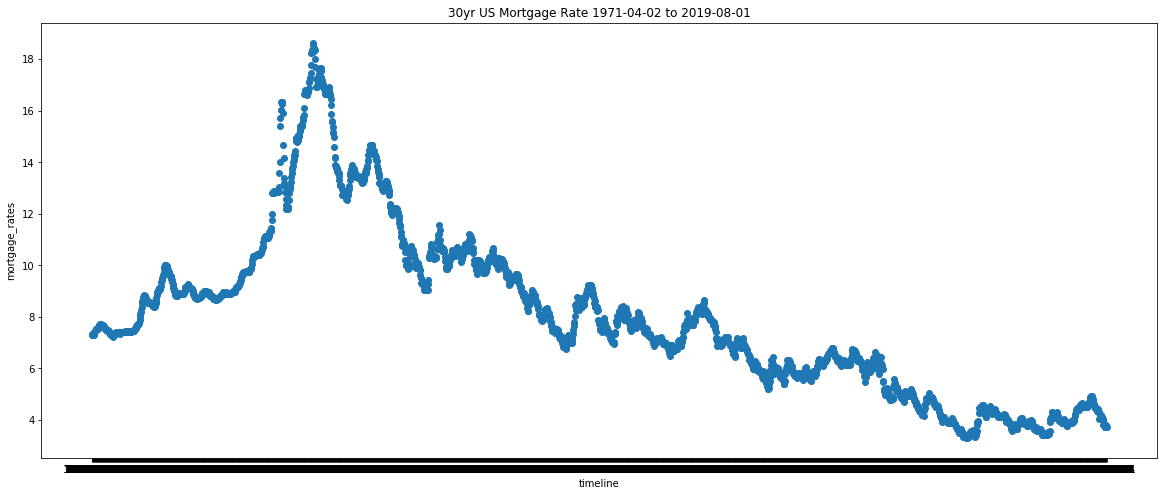

In [27]:
plt.figure(figsize=(20,8))
plt.scatter(x=mortgage_rates['DATE'], y=mortgage_rates['MORTGAGE30US'])
plt.ylabel('mortgage_rates')
plt.xlabel('timeline')
plt.title('30yr US Mortgage Rate {} to {}'.format(mortgage_rates['DATE'].min(), mortgage_rates['DATE'].max()));

This scatterplot represents the different mortgage rates in the US over time, between 1971 and 2019.  It shows a downward trend for the majority of the timeline, with the maximum rate peaking just above 18%.  There are a few "mini" peaks that have dates corresponding to financial crisis in the US (ie. early and mid 1980's, 1990, 2000, and 2007) 

# Historgam

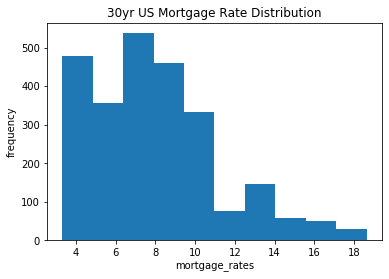

In [70]:
plt.hist(mortgage_rates['MORTGAGE30US'], bins=10)
plt.title('30yr US Mortgage Rate Distribution')
plt.xlabel('mortgage_rates')
plt.ylabel('frequency');

From this spread, it is comforting to know that +11% rates are not the most common.  There is an almost uniform distribution of rates between 3-11%.  With the downward trend from the scatterplot above, we may even expect more concentration of rates between 4-6% in the future.   

let's look at the change in rates between days!

In [44]:
mortgage_rates['delta'] = mortgage_rates['MORTGAGE30US'].diff()

In [46]:
mortgage_rates.head(5)

,DATE,MORTGAGE30US,delta
0,1971-04-02,7.33,NaN
1,1971-04-09,7.31,-0.02
2,1971-04-16,7.31,0.00
3,1971-04-23,7.31,0.00
4,1971-04-30,7.29,-0.02


In [47]:
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 3 columns):
DATE            2523 non-null object
MORTGAGE30US    2523 non-null float64
delta           2522 non-null float64
dtypes: float64(2), object(1)
memory usage: 59.2+ KB


In [48]:
#replace the null as 0 value
mortgage_rates.fillna(0, inplace=True)
mortgage_rates.head()

,DATE,MORTGAGE30US,delta
0,1971-04-02,7.33,0.00
1,1971-04-09,7.31,-0.02
2,1971-04-16,7.31,0.00
3,1971-04-23,7.31,0.00
4,1971-04-30,7.29,-0.02


In [54]:
mortgage_rates['delta'].min()

-1.2200000000000006

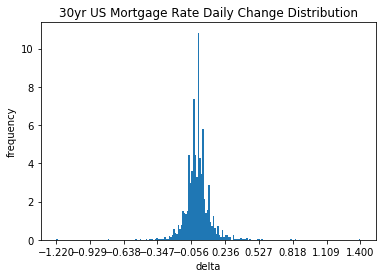

In [59]:
plt.hist(mortgage_rates['delta'], bins=200, density=True)
plt.title('30yr US Mortgage Rate Daily Change Distribution')
x_ticks = np.linspace(mortgage_rates['delta'].min(),mortgage_rates['delta'].max(),10)
plt.xticks(x_ticks)
plt.xlabel('delta')
plt.ylabel('frequency');

The largest change in a given day is 1.4%, and this looks to be an outlier.  The majority of daily change ranges between [-0.347,0.527]. This is good news for those in the process of buying a house since it is unlikely for rates to increase drastically. 

# Barplot

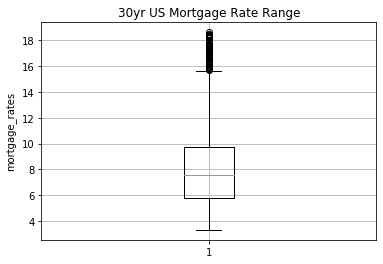

In [32]:
plt.boxplot(mortgage_rates['MORTGAGE30US'])
plt.title('30yr US Mortgage Rate Range')
plt.ylabel('mortgage_rates')
plt.grid();

In [40]:
mean = mortgage_rates['MORTGAGE30US'].mean()
median = mortgage_rates['MORTGAGE30US'].median()
rate_min = mortgage_rates['MORTGAGE30US'].min()
rate_max = mortgage_rates['MORTGAGE30US'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 8.035342845818437
median: 7.59
min: 3.31
max: 18.63


The mean and median values are skewed by the large collection of outliers.  Outliers start at ~16%.  It is interesting that the current rate <4% is in the bottom quartile.  If looking at rates alone, it is a good time to buy!  

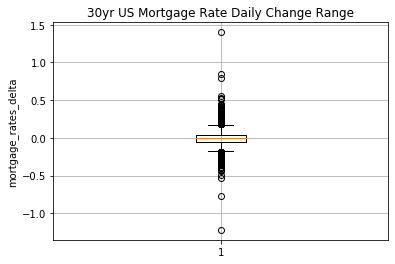

In [61]:
plt.boxplot(mortgage_rates['delta'])
plt.title('30yr US Mortgage Rate Daily Change Range')
plt.ylabel('mortgage_rates_delta')
plt.grid();

In [62]:
mean = mortgage_rates['delta'].mean()
median = mortgage_rates['delta'].median()
rate_min = mortgage_rates['delta'].min()
rate_max = mortgage_rates['delta'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: -0.001418945699564011
median: 0.0
min: -1.2200000000000006
max: 1.4000000000000004


Wow, the average change from day to day is almost 0, and a negative value at that!  Given the downward trend of the scatterplot above, this slight negative daily change is not surprising.  The inner quartile range is actually smaller than I expected based on the histogram plot above.  Perhaps there is no rush to grab the amazingly low mortgage rates right now?  Just don't sleep it off too long... 

# Summary of Descriptive Plots

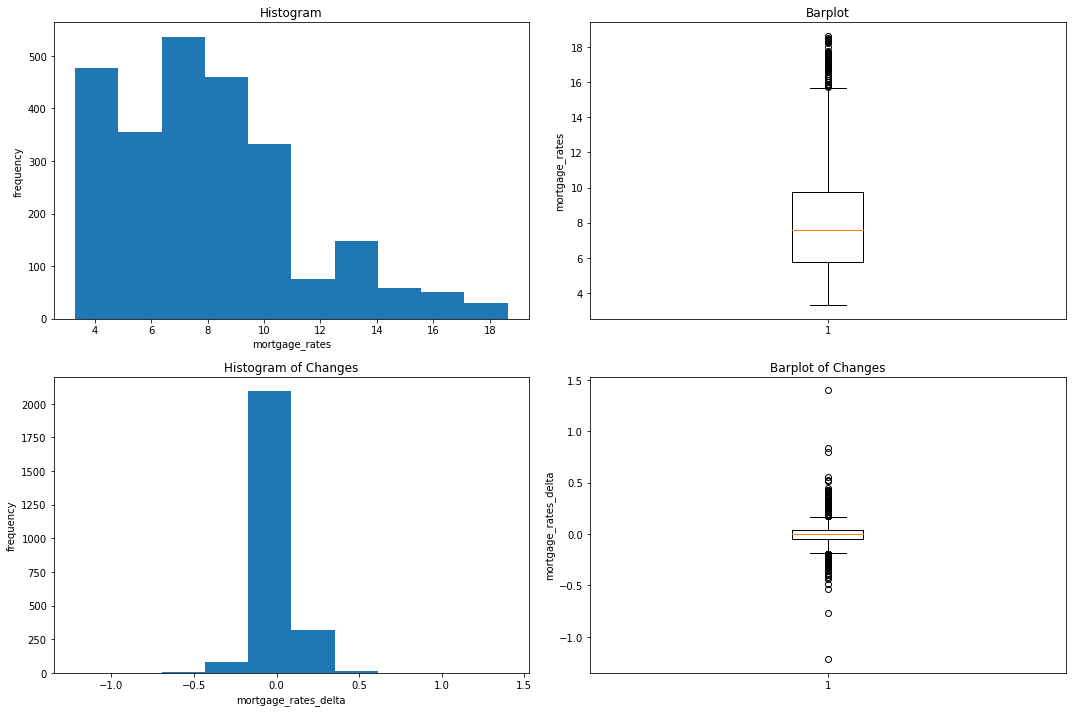

In [66]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(mortgage_rates['MORTGAGE30US'])
plt.title('Histogram')
plt.xlabel('mortgage_rates')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.boxplot(mortgage_rates['MORTGAGE30US'])
plt.title('Barplot')
plt.ylabel('mortgage_rates')

plt.subplot(2,2,3)
plt.hist(mortgage_rates['delta'])
plt.title('Histogram of Changes')
plt.xlabel('mortgage_rates_delta')
plt.ylabel('frequency')

plt.subplot(2,2,4)
plt.boxplot(mortgage_rates['delta'])
plt.title('Barplot of Changes')
plt.ylabel('mortgage_rates_delta')

plt.tight_layout();